<a href="https://colab.research.google.com/github/arora285/HelloWorld/blob/main/Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective:

Regression Problem:

1. To predict given target using various models.
2. To perform EDA and feature engineering.
3. Application of tunning of hyperparameters on different models.

## Importing initial libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Loading data

In [ ]:
#  Loading the data matrix available in the sklearn.

from sklearn.datasets import load_boston
df = load_boston()



In [ ]:
#  Converting the data matrix into the dataframe for easy access.

boston = pd.DataFrame(df["data"], columns=df["feature_names"])
boston["target"] = pd.Series(df["target"])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data description

In [ ]:
#  General information of the data.
boston.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [107]:
# No missing values present and as well all data are in numbers. Let's now study and visualise the data.
#  Statistic summary
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,1.778056,18.455534,5.749869,12.653063,22.532806
std,0.096679,0.233225,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,0.066296,2.164946,0.773471,7.141062,9.197104
min,0.000000,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,1.654623,12.600000,-1.139434,1.730000,5.000000
25%,0.000851,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,1.728325,17.400000,5.927932,6.950000,17.025000
50%,0.002812,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,1.757701,19.050000,5.969832,11.360000,21.200000
75%,0.041258,0.125000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,1.872001,20.200000,5.981982,16.955000,25.000000
max,1.000000,1.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,1.882007,22.000000,5.983684,37.970000,50.000000


In [106]:
# Checking if any null values

boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [105]:
#  Checking if any zero values present
(boston == 0).any()

CRIM        True
ZN          True
INDUS      False
CHAS        True
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
target     False
dtype: bool

## Exploratory Data Analysis (EDA) & Feature Engineering

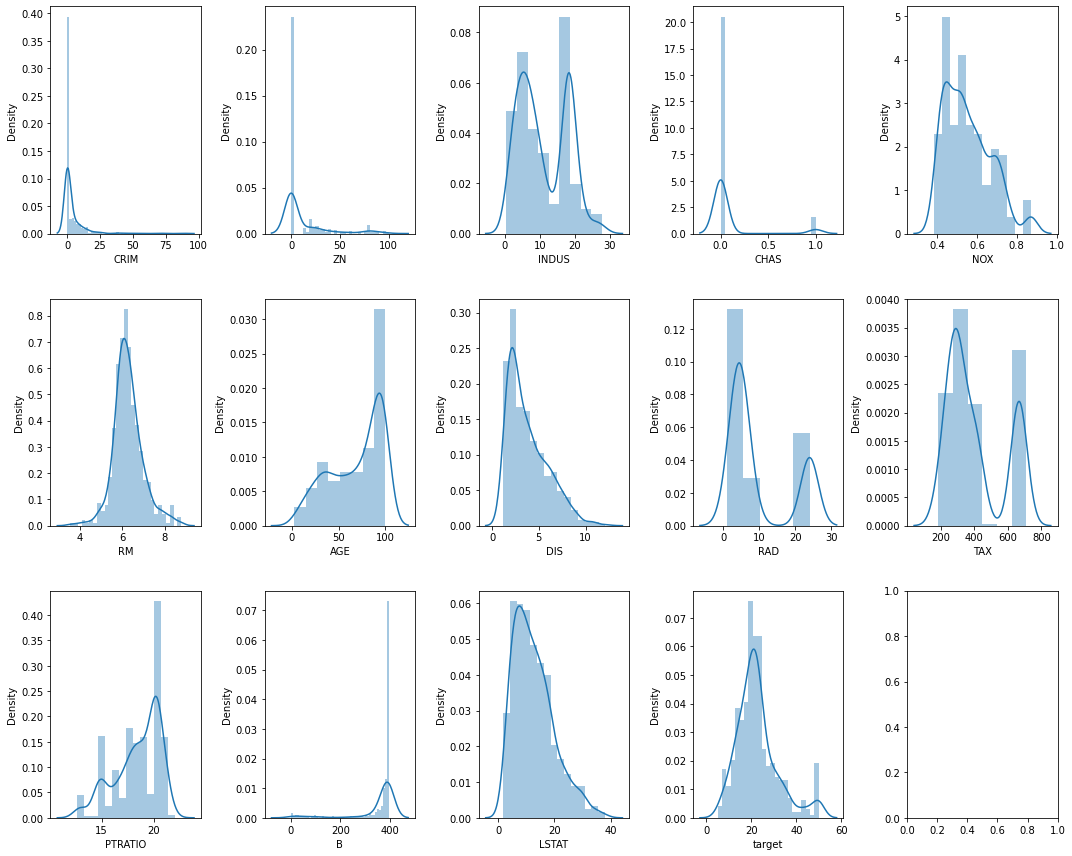

In [ ]:
# Let's check if any outliers present with the help of distribution and box plots.
#  So, that we can transform our data accordingly.

fig, ax=plt.subplots(3, 5, figsize=(15,12))
ax = ax.flatten()
i = 0
for col, value in boston.items():
  sns.distplot(value, ax=ax[i])
  i += 1

  plt.tight_layout(w_pad=0.8, h_pad=3)


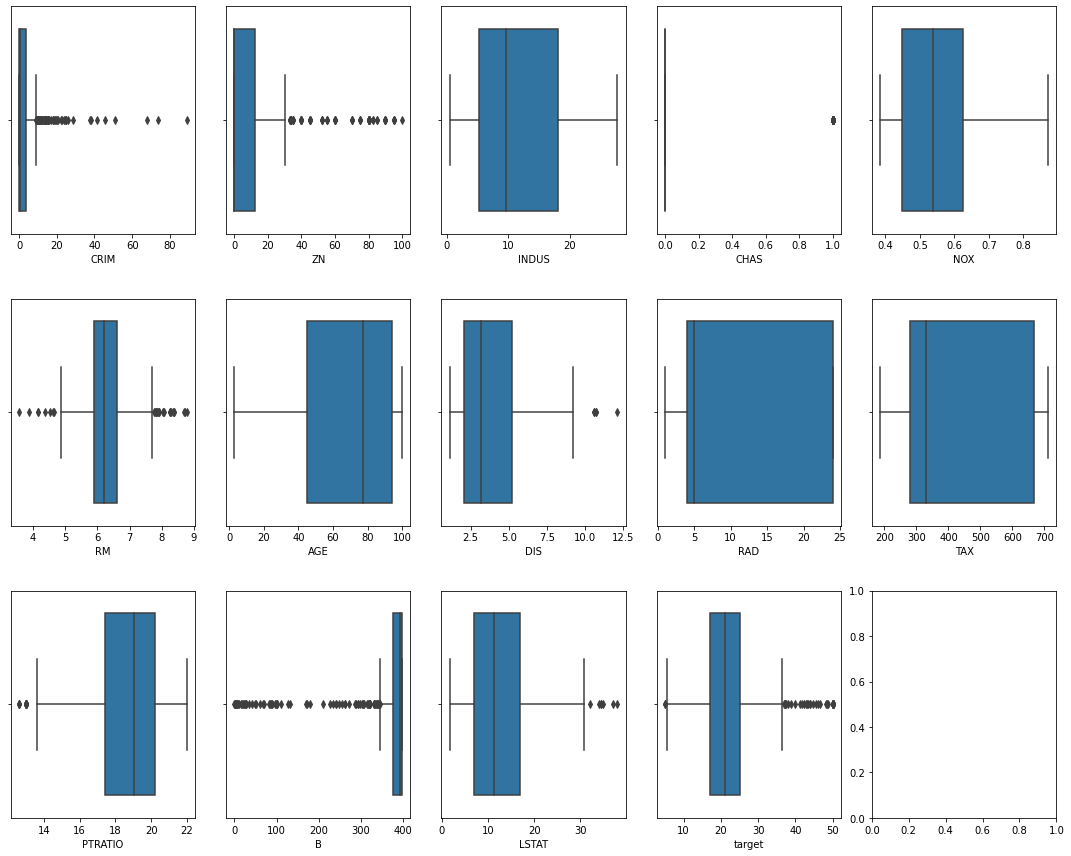

In [ ]:
fig, ax=plt.subplots(3, 5, figsize=(15,12))
ax = ax.flatten()
i = 0
for col, value in boston.items():
  sns.boxplot(x=col, data=boston, ax=ax[i])
  i += 1

  plt.tight_layout(w_pad=0.8, h_pad=3)


Observing above plots some features have very extreme values compared to other features present in them.
Let's now get rid of them using scaling methods.boston.head()

In [ ]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [ ]:
#  Let's use min max scaler and log transformation to reduce the effect of outliers present in some features.

from sklearn.preprocessing import minmax_scale
cols = ['CRIM', 'ZN']
for col in cols:
  boston[col] = minmax_scale(boston[col])

In [ ]:
boston["TAX"] = np.log(boston["TAX"])
boston["B"] = np.log(boston["B"])
#  Confirmimg by their plots.

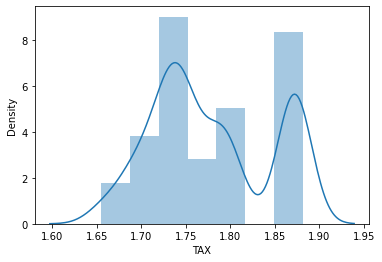

In [ ]:
sns.distplot(boston["TAX"])

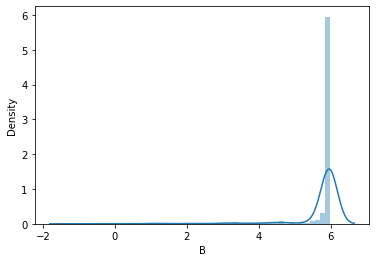

In [ ]:
sns.distplot(boston["B"])

In [ ]:
# Let's apply standard scaler to all the features. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'target', 'B', 'ZN', 'CHAS']
boston_new = pd.DataFrame(ColumnTransformer([("scaler", scaler, cols)]).fit_transform(boston), columns=cols)
boston_new

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target,B,ZN,CHAS
0,-0.419782,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.593125,-1.459000,-1.075562,0.159686,0.302592,0.284830,-0.272599
1,-0.417339,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-1.137264,-0.303094,-0.492439,-0.101524,0.302592,-0.487722,-0.272599
2,-0.417342,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-1.137264,-0.303094,-1.208727,1.324247,0.289253,-0.487722,-0.272599
3,-0.416750,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.376430,0.113032,-1.361517,1.182758,0.295169,-0.487722,-0.272599
4,-0.412482,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.376430,0.113032,-1.026501,1.487503,0.302592,-0.487722,-0.272599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.809292,1.176466,-0.418147,-0.014454,0.286483,-0.487722,-0.272599
502,-0.415249,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.809292,1.176466,-0.500850,-0.210362,0.302592,-0.487722,-0.272599
503,-0.413447,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.809292,1.176466,-0.983048,0.148802,0.302592,-0.487722,-0.272599
504,-0.407764,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.809292,1.176466,-0.865302,-0.057989,0.291294,-0.487722,-0.272599


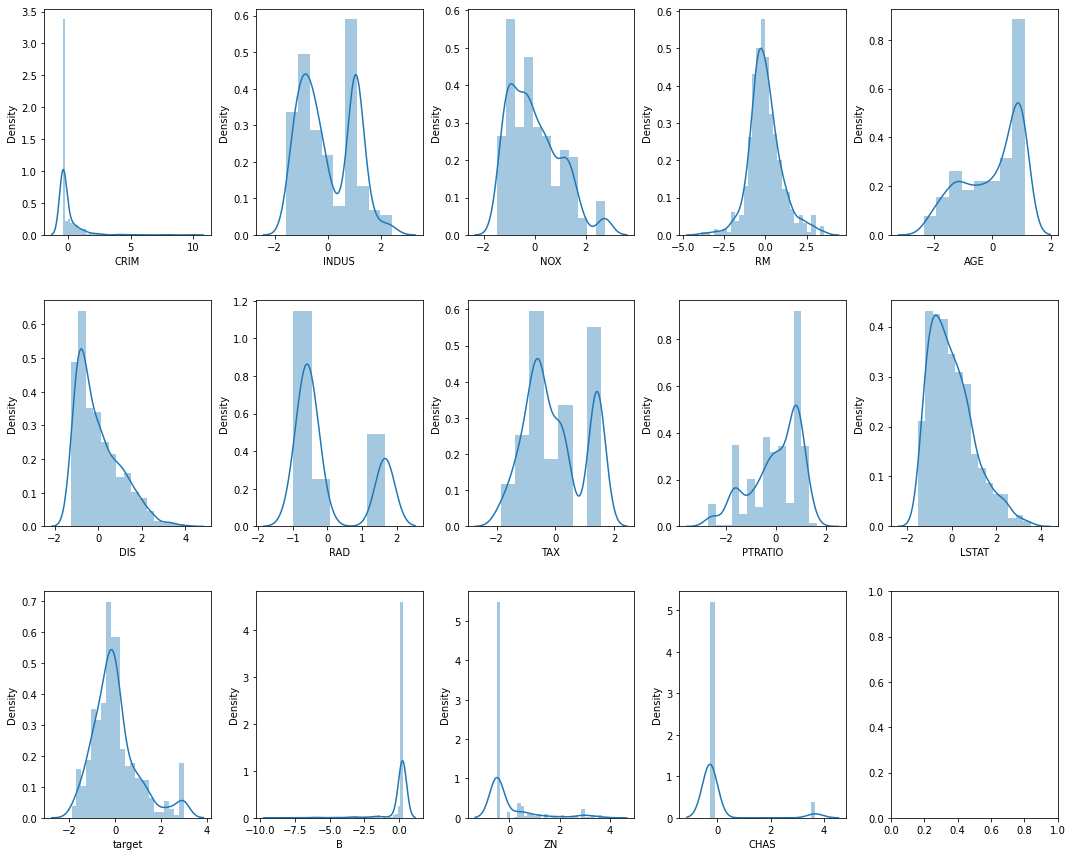

In [ ]:
fig, ax=plt.subplots(3, 5, figsize=(15,12))
ax = ax.flatten()
i = 0
for col, value in boston_new.items():
  sns.distplot(value, ax=ax[i])
  i += 1

  plt.tight_layout(w_pad=0.8, h_pad=3)

## Coorelation Matrix

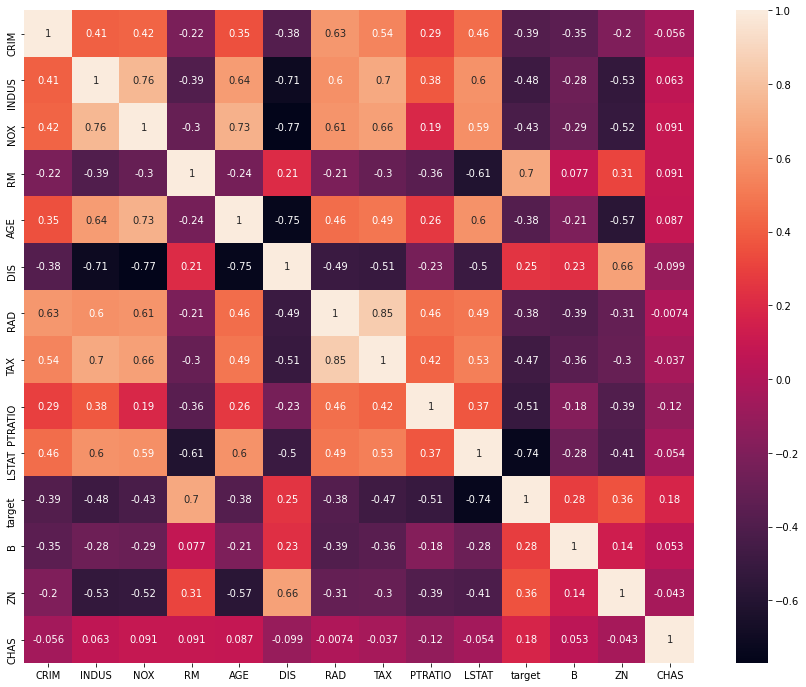

In [ ]:
corr = boston_new.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True);

# Every feature seems important (except "CHAS") as each one have a significant coorelation with the target feature.

Since we have visualised the data and as well our data is ready for the modelling. Exploring our data through modelling.



## Modelling

#### Random forest regressor, Linear regression, Laso, Ridge & Decision Tree

In [ ]:
#  Splitting data into x and y
x = boston_new.drop(['target', 'CHAS'], axis=1)
y = boston_new['target']
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
#  Placing models in a dictionary
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

models = {"Random Forest": RandomForestRegressor(),
          "Linear Rgressor": LinearRegression(),
          "Lasso": Lasso(),
          "Ridge": Ridge(),
          "Decision Tree": DecisionTreeRegressor()}

def Fit_Score(model, x_train, x_test, y_train, y_test):
  """will call the model from the dictionary and fit it and based on that evaluation will be done"""

  np.random.seed(45)
  model_scores = {}
  for name, model in models.items():
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    model_scores[name] = {"MAE": mean_absolute_error(y_test, y_preds),
                        "MSE": mean_squared_error(y_test, y_preds),
                        "R2": r2_score(y_test, y_preds)}
  return model_scores



In [ ]:
scores = Fit_Score(models, x_train, x_test, y_train, y_test)

In [ ]:
pd.DataFrame(scores.values(), scores.keys())

,MAE,MSE,R2
Random Forest,0.253374,0.121946,0.893416
Linear Rgressor,0.392029,0.296786,0.740600
Lasso,0.805846,1.144340,-0.000190
Ridge,0.391053,0.296874,0.740523
Decision Tree,0.306893,0.173811,0.848084


## Tunning Models
1. Random Forest

### Random Search CV & Grid Search CV

In [ ]:
# Using random search cv
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

grid = {"n_estimators": np.arange(10, 1000, 100),
        "max_depth": [None, 3, 5],
        "min_samples_split": np.arange(2, 10, 2),
        "min_samples_leaf": np.arange(1, 10, 2),
        "max_features": ["Sqrt", "auto"]}

RF = RandomForestRegressor(n_jobs=-1)

RF = RandomizedSearchCV(estimator=RF, param_distributions=grid, 
                               n_iter=10, cv=5, random_state=45, verbose=0, refit=True)

RF.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [ ]:
RF.best_params_

{'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 710}

In [ ]:
rs_preds = RF.predict(x_test)
rs_Scores = {mean_absolute_error(y_test, rs_preds),
          mean_squared_error(y_test, rs_preds),
          r2_score(y_test, rs_preds)}
rs_Scores

{0.19100104974175677, 0.3409320471708157, 0.8330589651610045}

In [ ]:
np.random.seed(45)
RF = RandomForestRegressor(n_jobs=-1)
grid_2 = {"n_estimators": [100, 710],
        "max_depth": [None, 3],
        "min_samples_split":[2],
        "min_samples_leaf": [1],
        "max_features": ["auto", "Sqrt"]}

gs_forest = GridSearchCV(RF, param_grid=grid_2, cv=5, refit=True, verbose=True, n_jobs=-1)

gs_forest.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   20.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
gs_forest.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 710}

After tuning the hyper parameters as shown above. we can conclude that our original models are the best fit.

## Feature Importance
Best fit models

{'MAE': 0.2533736476633379, 'MSE': 0.12194567100079183, 'R2': 0.8934155778801605}


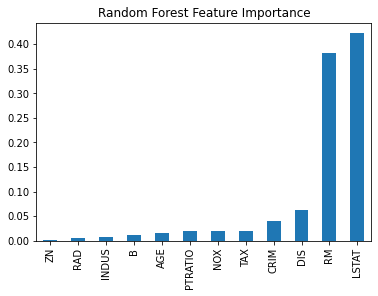

In [103]:
np.random.seed(45)
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
preds = RF.predict(x_test)
Scores = {"MAE": mean_absolute_error(y_test, preds),
          "MSE": mean_squared_error(y_test, preds),
          "R2": r2_score(y_test, preds)}
print(Scores)
Features = pd.Series(RF.feature_importances_, x.columns).sort_values(ascending=True)
Features.plot.bar(title="Random Forest Feature Importance");

2. Linear Regression

{'MAE': 0.3920294058825358, 'MSE': 0.2967859711120863, 'R2': 0.7405995558132465}


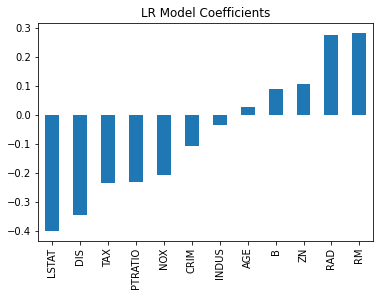

In [104]:
np.random.seed(45)
LR = LinearRegression(normalize=True)
LR.fit(x_train, y_train)
LR_preds = LR.predict(x_test)
LR_scores= {"MAE": mean_absolute_error(y_test, LR_preds),
            "MSE": mean_squared_error(y_test, LR_preds),
            "R2": r2_score(y_test, LR_preds),
            }
print(LR_scores)

coef = pd.Series(LR.coef_, x.columns).sort_values(ascending=True)
coef.plot.bar(title="LR Model Coefficients");